In [22]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
metadata_raw = pd.read_csv('out/metadata.csv').drop_duplicates()
print(metadata_raw.shape)
metadata_raw.head(10)

(3745, 10)


,title,fulltitle,duration,artist,album,abr,vbr,tbr,release_year,filesize_approx
0,Hạnh Phúc Buồn,Hạnh Phúc Buồn,280,Randy,Cộng Trừ Nhân Chia,128,0,128,NaN,4480000
1,Bất Nhiễm (Cover),Bất Nhiễm (Cover),250,Thủy Tiên,Bất Nhiễm (Cover) (Single),128,0,128,NaN,4000000
2,LK Thất Tình,LK Thất Tình,303,"Mạnh Đình, Trường Vũ, Mạnh Quỳnh",Việt Nam,128,0,128,NaN,4848000
3,Vẫn Mãi Thế Hệ Tụi Mình,Vẫn Mãi Thế Hệ Tụi Mình,227,Phạm Toàn Thắng,Vẽ,128,0,128,NaN,3632000
4,Chỉ Vì Giận Nhau,Chỉ Vì Giận Nhau,258,Tâm Minhon,Những Ngày Qua Hạnh Phúc,128,0,128,NaN,4128000
5,Chưa Vơi Câu Hò,Chưa Vơi Câu Hò,298,Đan Trường,Đến Một Lúc Nào Đó,128,0,128,NaN,4768000
6,Hai Quê Một Nỗi Niềm,Hai Quê Một Nỗi Niềm,316,"Khưu Huy Vũ, Ngô Quốc Linh",Tình Quê Miền Tây,128,0,128,NaN,5056000
7,Anh Em Một Lòng Có Nhau (Remix),Anh Em Một Lòng Có Nhau (Remix),287,"Dương Minh Kiệt, Trịnh Tuấn Vỹ",Anh Em Một Lòng Có Nhau (Remix) (Single),128,0,128,NaN,4592000
8,Đợi Chờ Bóng Xuân,Đợi Chờ Bóng Xuân,335,Eric Toàn Nguyễn,Trách Duyên Bẽ Bàng,128,0,128,NaN,5360000
9,Chàng Là Tình Duyên Đẹp Nhất Đời Ta (Remix),Chàng Là Tình Duyên Đẹp Nhất Đời Ta (Remix),267,Oanh Tạ,Chàng Là Tình Duyên Đẹp Nhất Đời Ta (Single),128,0,128,NaN,4272000


In [6]:
first_3000 = metadata_raw.head(3000)

In [7]:
# number of albums/artists
print(first_3000['artist'].drop_duplicates().count())
print(first_3000['album'].drop_duplicates().count())

1894
2046


/home/bernard/miniconda3/envs/mlenv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


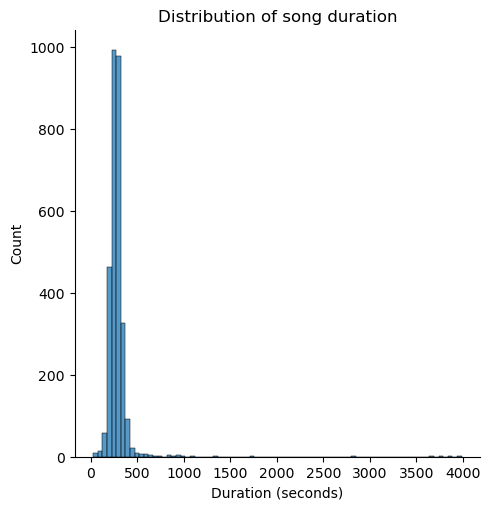

In [13]:
ax = sns.displot(first_3000, x="duration", bins=80)
ax.set(xlabel='Duration (seconds)', ylabel='Count', title='Distribution of song duration')
plt.show()

In [14]:
first_3000.describe()

,duration,abr,vbr,tbr,release_year,filesize_approx
count,3000.000000,3000.0,3000.0,3000.0,0.0,3.000000e+03
mean,282.004333,128.0,0.0,128.0,NaN,4.512069e+06
std,158.966631,0.0,0.0,0.0,NaN,2.543466e+06
min,25.000000,128.0,0.0,128.0,NaN,4.000000e+05
25%,237.000000,128.0,0.0,128.0,NaN,3.792000e+06
50%,271.000000,128.0,0.0,128.0,NaN,4.336000e+06
75%,305.000000,128.0,0.0,128.0,NaN,4.880000e+06
max,3987.000000,128.0,0.0,128.0,NaN,6.379200e+07


In [15]:
first_3000['duration'].median()

271.0

In [23]:
def get_token_count(file_name:str):
    token_count = 0
    with open(file_name, 'r') as file:
        # Read each line in the file
        for line in file:
            line = line.strip()
            cleaned_string = re.sub(r'\[.+\]', '', line)
            count = len(cleaned_string.split(' '))
            token_count += count
    return token_count

get_token_count(os.path.join('./out',os.listdir('./out')[0]))

295

In [33]:
file_dir = './out'
metadata_list = first_3000['title'].to_list()
total_token_count = {}
ave_token_per_min = {}
for file in os.listdir(file_dir):
    file_name = file.split('.')[0]
    if file_name in metadata_list:
        token_count = get_token_count(os.path.join(file_dir,file))
        duration = int(first_3000.query(f'title=="{file_name}"')['duration'])
        total_token_count[file_name] = token_count
        ave_token_per_min[file_name] = (token_count / duration) * 60
        

/tmp/ipykernel_394158/491965988.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  duration = int(first_3000.query(f'title=="{file_name}"')['duration'])


In [38]:
wpm_df = pd.DataFrame.from_dict(ave_token_per_min, orient='index', columns=['wpm'])\
                    .reset_index()\
                    .rename(columns={"index": "Title"})
wpm_df.head(5)

,Title,wpm
0,Khi Chuyển Đông,68.871595
1,Anh Là Tất Cả,85.068493
2,Vá Víu Một Lời Hứa,96.338028
3,Chờ Ai Muôn Kiếp,52.313167
4,Lạc Trong Hồi Kết Buồn,112.566372


In [41]:
wpm_df.describe()

,wpm
count,2814.000000
mean,90.703777
std,33.846349
min,20.304183
25%,69.069783
50%,84.867303
75%,102.881586
max,288.750000


/home/bernard/miniconda3/envs/mlenv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


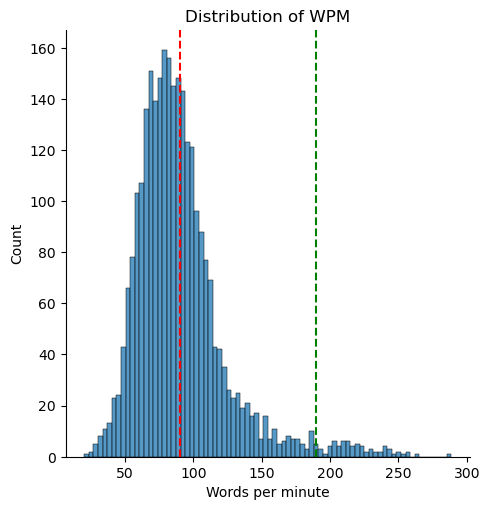

In [42]:
ax = sns.displot(wpm_df, x="wpm", bins=80)
ax.set(xlabel='Words per minute', ylabel='Count', title='Distribution of WPM')
plt.axvline(x=90, color='red', linestyle='--') # slow speech
plt.axvline(x=190, color='green', linestyle='--') # average speech
plt.show()